In [3]:
import os
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Family Name
#Given Name
#Effective Date
#Agency
#SubAgency
#AccSep
#State
#Age Range
#YSD (Year Since Degree) Range 
#Education Level
#Pay Plan
#Grade
#LOS (Length of Service) Level
#Occupation
#Occupational Category (PATCO)
#Adjusted Basic Pay
#TOA (Type of Appointment)
#Work Schedule
#NSFTP (Non-Seasonal Full-Time Permanent) Indicator

education_translation = {
    '':'-No Data Reported',
    '*':'*-Invalid',
    '01':'01-NO FORMAL EDUCATION OR SOME ELEMENTARY SCHOOL - DID NOT COMPLETE',
    '02':'02-ELEMENTARY SCHOOL COMPLETED - NO HIGH SCHOOL',
    '03':'03-SOME HIGH SCHOOL - DID NOT COMPLETE',
    '04':'04-HIGH SCHOOL GRADUATE OR CERTIFICATE OF EQUIVALENCY',
    '05':'05-TERMINAL OCCUPATIONAL PROGRAM - DID NOT COMPLETE',
    '06':'06-TERMINAL OCCUPATIONAL PROGRAM - CERTIFICATE OF COMPLETION, DIPLOMA OR EQUIV',
    '07':'07-SOME COLLEGE - LESS THAN ONE YEAR',
    '08':'08-ONE YEAR COLLEGE',
    '09':'09-TWO YEARS COLLEGE',
    '10':'10-ASSOCIATE DEGREE',
    '11':'11-THREE YEARS COLLEGE',
    '12':'12-FOUR YEARS COLLEGE',
    '13':'13-BACHELORS DEGREE',
    '14':'14-POST-BACHELORS',
    '15':'15-FIRST PROFESSIONAL',
    '16':'16-POST-FIRST PROFESSIONAL',
    '17':'17-MASTERS DEGREE',
    '18':'18-POST-MASTERS',
    '19':'19-SIXTH-YEAR DEGREE',
    '20':'20-POST-SIXTH YEAR',
    '21':'21-DOCTORATE DEGREE',
    '22':'22-POST-DOCTORATE'
}

In [7]:
os.chdir('../data/sampleData/Samples/')

### Read the data

In [8]:
NonDodSeparation =pd.read_csv('2014-2016////Non-DOD////Separations Non_DoD FY2015Q4.txt',
                sep='|', index_col=False,
                 names=['family_name','given_name','effective_date','agency','sub_agency','acc_sep_code','state','age_range','year_since_degree','education_level','pay_plan','grade','length_of_service_level','occupation','occupation_category','adjusted_basic_pay','type_of_appointment','wsch','non_seasonal_full_time_permanent_indicator'])


###### Data Overview

In [9]:
NonDodSeparation

,family_name,given_name,effective_date,agency,sub_agency,acc_sep_code,state,age_range,year_since_degree,education_level,pay_plan,grade,length_of_service_level,occupation,occupation_category,adjusted_basic_pay,type_of_appointment,wsch,non_seasonal_full_time_permanent_indicator
0,TANIGUCHI,ALINE,20150828,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,SD,37,65 or more,15 - 19 years,17,AD,03,30 - 34 years,0610-NURSE,P,127388.00,48,F,2
1,KEEN,WAYNE,20150930,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,SD,06,65 or more,30 - 34 years,17,GS,13,20 - 24 years,1102-CONTRACTING,P,114665.00,38,F,1
2,RENNIE,DALE,20150930,IN-DEPARTMENT OF THE INTERIOR,IN05-BUREAU OF LAND MANAGEMENT,SD,41,65 or more,35 - 39 years,13,GS,09,10 - 14 years,2210-INFORMATION TECHNOLOGY MANAGEMENT,A,67977.00,10,F,1
3,DANIELS,LEANNE,20150930,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,SD,33,55-59,25 - 29 years,06,GS,12,35 or more,1102-CONTRACTING,P,92085.00,10,F,1
4,CHEVALIER,RAYMOND,20150930,HS-DEPARTMENT OF HOMELAND SECURITY,HSCB-FEDERAL EMERGENCY MANAGEMENT AGENCY,SD,24,60-64,20 - 24 years,13,GS,14,35 or more,1712-TRAINING INSTRUCTION,A,128790.00,10,F,1
5,CYR,JEANNINE,20150823,HE-DEPARTMENT OF HEALTH AND HUMAN SERVICES,HE10-OFFICE OF THE SECRETARY OF HEALTH AND HUM...,SJ,11,60-64,Unspecified,07,GS,14,15 - 19 years,0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,A,128790.00,20,I,2
6,ROBINSON,JOSEPH,20150808,VA-DEPARTMENT OF VETERANS AFFAIRS,VATA-VETERANS HEALTH ADMINISTRATION,SJ,45,60-64,25 - 29 years,13,AD,12,5 - 9 years,0603-PHYSICIAN ASSISTANT,A,91255.00,48,F,2
7,IRVING,SARA,20150726,AG-DEPARTMENT OF AGRICULTURE,AG11-FOREST SERVICE,SJ,35,60-64,Unspecified,04,GS,04,5 - 9 years,0462-FORESTRY TECHNICIAN,T,28553.00,20,F,2
8,BRODEUR,CHERYL,20150911,HS-DEPARTMENT OF HOMELAND SECURITY,HSCB-FEDERAL EMERGENCY MANAGEMENT AGENCY,SC,12,55-59,Unspecified,04,IM,00,3 - 4 years,0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,A,66408.34,48,I,2
9,NEVINS,SCOTT,20150731,HS-DEPARTMENT OF HOMELAND SECURITY,HSAC-U.S. COAST GUARD,SD,25,60-64,Unspecified,04,WG,10,5 - 9 years,5306-AIR CONDITIONING EQUIPMENT MECHANIC,B,57058.58,10,F,1


###### Print dataframe information

In [10]:
NonDodSeparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40477 entries, 0 to 40476
Data columns (total 19 columns):
family_name                                   40477 non-null object
given_name                                    40477 non-null object
effective_date                                40477 non-null int64
agency                                        40477 non-null object
sub_agency                                    40477 non-null object
acc_sep_code                                  40477 non-null object
state                                         40477 non-null object
age_range                                     40477 non-null object
year_since_degree                             40477 non-null object
education_level                               40477 non-null object
pay_plan                                      40380 non-null object
grade                                         40477 non-null object
length_of_service_level                       40477 non-null object
occupati

###### Number of rows

In [11]:
NonDodSeparation.shape[0]

40477

###### Number of columns

In [12]:
NonDodSeparation.shape[1]

19

###### Column names

In [13]:
NonDodSeparation.columns

Index(['family_name', 'given_name', 'effective_date', 'agency', 'sub_agency',
       'acc_sep_code', 'state', 'age_range', 'year_since_degree',
       'education_level', 'pay_plan', 'grade', 'length_of_service_level',
       'occupation', 'occupation_category', 'adjusted_basic_pay',
       'type_of_appointment', 'wsch',
       'non_seasonal_full_time_permanent_indicator'],
      dtype='object')

###### How is the data indexed

In [14]:
NonDodSeparation.index

RangeIndex(start=0, stop=40477, step=1)

###### What is the most common education level?

In [15]:
NonDodSeparation['education_level'].value_counts().head()

04    10003
13     8575
17     4206
       2229
10     1909
Name: education_level, dtype: int64

###### Most Common Occupation?

In [16]:
NonDodSeparation['occupation_category'].value_counts().head()

T    11706
A     9248
P     7927
C     5680
O     3167
Name: occupation_category, dtype: int64

##### Most common service duration?

In [17]:
NonDodSeparation['occupation'].value_counts().head()

0303-MISCELLANEOUS CLERK AND ASSISTANT    3687
0462-FORESTRY TECHNICIAN                  2691
1802-COMPLIANCE INSPECTION AND SUPPORT    1529
0610-NURSE                                1495
0404-BIOLOGICAL SCIENCE TECHNICIAN        1444
Name: occupation, dtype: int64

##### Most Common Age Range

In [18]:
NonDodSeparation['age_range'].value_counts().head()

25-29    5347
20-24    4700
30-34    4684
60-64    4604
55-59    4191
Name: age_range, dtype: int64

##### Most common agency

In [19]:
NonDodSeparation['agency'].value_counts().head()

VA-DEPARTMENT OF VETERANS AFFAIRS     9348
IN-DEPARTMENT OF THE INTERIOR         6039
AG-DEPARTMENT OF AGRICULTURE          5542
HS-DEPARTMENT OF HOMELAND SECURITY    3444
CM-DEPARTMENT OF COMMERCE             2849
Name: agency, dtype: int64

##### Most Common SubAgency

In [20]:
NonDodSeparation['sub_agency'].value_counts().head()

VATA-VETERANS HEALTH ADMINISTRATION    8673
AG11-FOREST SERVICE                    3733
IN10-NATIONAL PARK SERVICE             3706
CM63-BUREAU OF THE CENSUS              2376
TR93-INTERNAL REVENUE SERVICE          1951
Name: sub_agency, dtype: int64

##### Corelations

In [21]:
los_pay = NonDodSeparation[['length_of_service_level','adjusted_basic_pay']]
los_pay['adjusted_basic_pay'] = pd.to_numeric(los_pay['adjusted_basic_pay'],errors='coerce')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
los_pay.groupby(['length_of_service_level'])['adjusted_basic_pay'].mean()

length_of_service_level
1 - 2 years          49099.465380
10 - 14 years        75815.680780
15 - 19 years        83885.414163
20 - 24 years        89552.223375
25 - 29 years        97268.411589
3 - 4 years          58450.584524
30 - 34 years       101583.893554
35 or more          102343.441016
5 - 9 years          69592.149601
Less than 1 year     36307.863974
Name: adjusted_basic_pay, dtype: float64

##### Most common states for Non-Dod employees

In [23]:
NonDodSeparation['state'].value_counts().head()


##    5608
11    3754
06    2914
24    1905
48    1880
Name: state, dtype: int64

##### Mean salary by length of service levels

In [47]:
NonDodSeparation['education_level'].map(education_translation).value_counts()
pay_by_los = los_pay.groupby(['length_of_service_level'])['adjusted_basic_pay'].mean()
pay_by_los = pd.DataFrame({'mean' : los_pay.groupby(['length_of_service_level'])['adjusted_basic_pay'].mean()}).reset_index()
pay_by_los = pay_by_los.sort_values('mean')
pay_by_los

,length_of_service_level,mean
9,Less than 1 year,36307.863974
0,1 - 2 years,49099.465380
5,3 - 4 years,58450.584524
8,5 - 9 years,69592.149601
1,10 - 14 years,75815.680780
2,15 - 19 years,83885.414163
3,20 - 24 years,89552.223375
4,25 - 29 years,97268.411589
6,30 - 34 years,101583.893554
7,35 or more,102343.441016


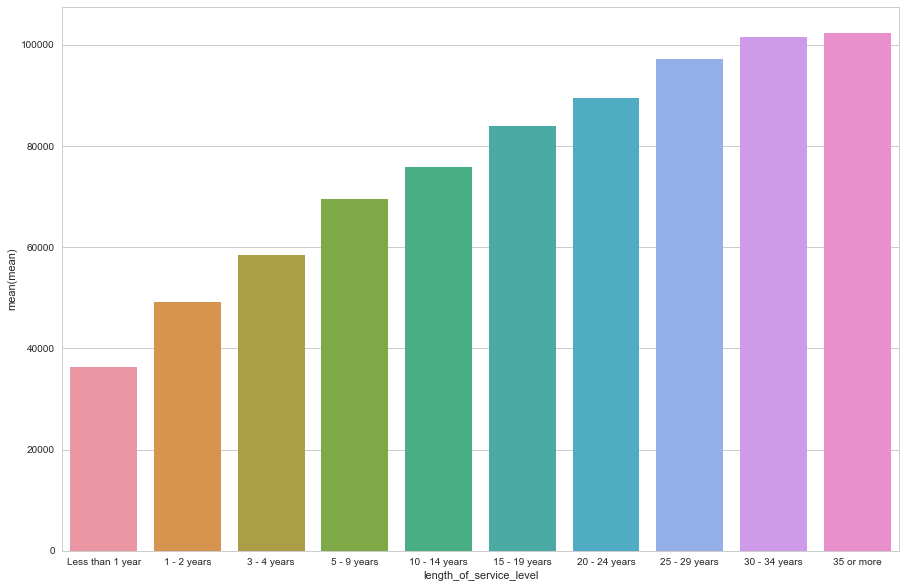

In [48]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(x='length_of_service_level', y='mean',data=pay_by_los)